In [134]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
surrogates = ['BNN', 'RF', 'GP', 'DE']
exp_dict = {'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
results_dict = {surrogate:copy.deepcopy(exp_dict) for surrogate in surrogates}
directory="./results_mnist"
for foldername in os.listdir(directory):
    folder = os.path.join(directory, foldername)
    if os.path.isdir(folder):
        for filename in os.listdir(folder):
            if filename.find("parameters") != -1:
                json_file = open(os.path.join(folder, filename))
                params = json.load(json_file)
            elif filename.find("metrics") != -1:
                json_file = open(os.path.join(folder, filename))
                metrics = json.load(json_file)
        if params['bo'] == True and params['acquisition']=="EI":
            results_dict[params['surrogate']]['inst_regret_test'].append(metrics['y_regret_test'])
            results_dict[params['surrogate']]['inst_regret_pool'].append(metrics['y_regret_pool'])
            results_dict[params['surrogate']]['tot_regret_test'].append(np.cumsum(metrics['y_regret_test']))
            results_dict[params['surrogate']]['tot_regret_pool'].append(np.cumsum(metrics['y_regret_pool']))
            results_dict[params['surrogate']]['x_opt_dist_pool'].append(metrics['x_y_opt_dist_pool'])
            results_dict[params['surrogate']]['x_opt_dist_test'].append(metrics['x_y_opt_dist_test'])
            results_dict[params['surrogate']]['calibration_mse'].append(metrics['y_calibration_mse'])

In [118]:
column_names = {'surrogate':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for surrogate in surrogates:
    column_names['surrogate'].append(surrogate)
    column_names['inst_regret_test'].append(np.array(results_dict[surrogate]['inst_regret_test']).mean(axis=0)[-1])
    column_names['inst_regret_pool'].append(np.array(results_dict[surrogate]['inst_regret_pool']).mean(axis=0)[-1])
    column_names['tot_regret_test'].append(np.array(results_dict[surrogate]['tot_regret_test']).mean(axis=0)[-1])
    column_names['tot_regret_pool'].append(np.array(results_dict[surrogate]['tot_regret_pool']).mean(axis=0)[-1])
    column_names['calibration_mse'].append(np.array(results_dict[surrogate]['calibration_mse']).mean(axis=0)[-1])
    column_names['sharpness'].append(np.array(results_dict[surrogate]['calibration_mse']).mean(axis=0)[-1])
    column_names['x_opt_dist_test'].append(np.array(results_dict[surrogate]['x_opt_dist_test']).mean(axis=0)[-1])
    column_names['x_opt_dist_pool'].append(np.array(results_dict[surrogate]['x_opt_dist_pool']).mean(axis=0)[-1])

In [119]:
df = pd.DataFrame.from_dict(column_names)
display(df)

,surrogate,inst_regret_test,inst_regret_pool,tot_regret_test,tot_regret_pool,calibration_mse,sharpness,x_opt_dist_test,x_opt_dist_pool
0,BNN,0.055401,0.053788,6.629648,6.475709,0.080848,0.080848,2.226489,2.176705
1,RF,0.005855,0.003935,1.353766,1.167717,0.021673,0.021673,1.690952,1.201067
2,GP,0.003666,0.001756,2.038871,1.885037,0.017040,0.017040,1.800995,0.971749
3,DE,0.002760,0.000888,1.128171,0.951735,0.033327,0.033327,1.705922,0.593549


In [162]:
import json
import os
import numpy as np
import pandas as pd
import copy
surrogates = ['BNN', 'RF', 'GP', 'DE']
exp_dict = {'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
results_dict = {surrogate:copy.deepcopy(exp_dict) for surrogate in surrogates}
directory="./results_mnist"
for foldername in os.listdir(directory):
    folder = os.path.join(directory, foldername)
    if os.path.isdir(folder):
        for filename in os.listdir(folder):
            if filename.find("parameters") != -1:
                json_file = open(os.path.join(folder, filename))
                params = json.load(json_file)
            elif filename.find("metrics") != -1:
                json_file = open(os.path.join(folder, filename))
                metrics = json.load(json_file)
        if params['bo'] == True and params['acquisition'] != 'RS':
            results_dict[params['surrogate']]['inst_regret_test'].append(metrics['y_regret_test'])
            results_dict[params['surrogate']]['inst_regret_pool'].append(metrics['y_regret_pool'])
            results_dict[params['surrogate']]['tot_regret_test'].append(np.cumsum(metrics['y_regret_test']))
            results_dict[params['surrogate']]['tot_regret_pool'].append(np.cumsum(metrics['y_regret_pool']))
            results_dict[params['surrogate']]['x_opt_dist_pool'].append(metrics['x_y_opt_dist_pool'])
            results_dict[params['surrogate']]['x_opt_dist_test'].append(metrics['x_y_opt_dist_test'])
            results_dict[params['surrogate']]['calibration_mse'].append(metrics['y_calibration_mse'])

In [163]:
column_names = {'surrogate':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for surrogate in surrogates:
    column_names['surrogate'].append(surrogate)
    column_names['inst_regret_test'].append(np.array(results_dict[surrogate]['inst_regret_test']).mean(axis=0)[-1])
    column_names['inst_regret_pool'].append(np.array(results_dict[surrogate]['inst_regret_pool']).mean(axis=0)[-1])
    column_names['tot_regret_test'].append(np.array(results_dict[surrogate]['tot_regret_test']).mean(axis=0)[-1])
    column_names['tot_regret_pool'].append(np.array(results_dict[surrogate]['tot_regret_pool']).mean(axis=0)[-1])
    column_names['calibration_mse'].append(np.array(results_dict[surrogate]['calibration_mse']).mean(axis=0)[-1])
    column_names['sharpness'].append(np.array(results_dict[surrogate]['calibration_mse']).mean(axis=0)[-1])
    column_names['x_opt_dist_test'].append(np.array(results_dict[surrogate]['x_opt_dist_test']).mean(axis=0)[-1])
    column_names['x_opt_dist_pool'].append(np.array(results_dict[surrogate]['x_opt_dist_pool']).mean(axis=0)[-1])

In [164]:
df = pd.DataFrame.from_dict(column_names)
display(df)

,surrogate,inst_regret_test,inst_regret_pool,tot_regret_test,tot_regret_pool,calibration_mse,sharpness,x_opt_dist_test,x_opt_dist_pool
0,BNN,0.044012,0.042419,5.798219,5.645461,0.079869,0.079869,2.173108,2.095891
1,RF,0.005628,0.003812,1.348668,1.172287,0.021347,0.021347,1.686164,1.202996
2,GP,0.004083,0.002138,2.031855,1.873596,0.016895,0.016895,1.826441,1.016281
3,DE,0.002680,0.000808,1.120873,0.943984,0.034064,0.034064,1.711671,0.521064


In [166]:
import json
import os
import numpy as np
import pandas as pd
import copy
surrogates = ['BNN', 'RF', 'GP', 'DE']
acquisitions = ['EI', 'RS', 'UCB']
exp_dict = {'acquisition':[],'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
results_dict = {surrogate:{acquisition:copy.deepcopy(exp_dict) for acquisition in acquisitions} for surrogate in surrogates}
directory="./results_mnist"
for foldername in os.listdir(directory):
    folder = os.path.join(directory, foldername)
    if os.path.isdir(folder):
        for filename in os.listdir(folder):
            if filename.find("parameters") != -1:
                json_file = open(os.path.join(folder, filename))
                params = json.load(json_file)
            elif filename.find("metrics") != -1:
                json_file = open(os.path.join(folder, filename))
                metrics = json.load(json_file)
        if params['bo'] == True:
            results_dict[params['surrogate']][params['acquisition']]['inst_regret_test'].append(metrics['y_regret_test'])
            results_dict[params['surrogate']][params['acquisition']]['inst_regret_pool'].append(metrics['y_regret_pool'])
            results_dict[params['surrogate']][params['acquisition']]['tot_regret_test'].append(np.cumsum(metrics['y_regret_test']))
            results_dict[params['surrogate']][params['acquisition']]['tot_regret_pool'].append(np.cumsum(metrics['y_regret_pool']))
            results_dict[params['surrogate']][params['acquisition']]['x_opt_dist_pool'].append(metrics['x_y_opt_dist_pool'])
            results_dict[params['surrogate']][params['acquisition']]['x_opt_dist_test'].append(metrics['x_y_opt_dist_test'])
            results_dict[params['surrogate']][params['acquisition']]['calibration_mse'].append(metrics['y_calibration_mse'])

In [171]:
column_names = {'surrogate':[], 'acquisition':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for surrogate in surrogates:
    for acq in acquisitions:
        result_dict = results_dict[surrogate][acq]
        column_names['surrogate'].append(surrogate)
        column_names['acquisition'].append(acq)
        column_names['inst_regret_test'].append(np.array(result_dict['inst_regret_test']).mean(axis=0)[-1])
        column_names['inst_regret_pool'].append(np.array(result_dict['inst_regret_pool']).mean(axis=0)[-1])
        column_names['tot_regret_test'].append(np.array(result_dict['tot_regret_test']).mean(axis=0)[-1])
        column_names['tot_regret_pool'].append(np.array(result_dict['tot_regret_pool']).mean(axis=0)[-1])
        column_names['calibration_mse'].append(np.array(result_dict['calibration_mse']).mean(axis=0)[-1])
        column_names['x_opt_dist_test'].append(np.array(result_dict['x_opt_dist_test']).mean(axis=0)[-1])
        column_names['x_opt_dist_pool'].append(np.array(result_dict['x_opt_dist_pool']).mean(axis=0)[-1])
#EXPLORATION PARAM IN UCB?

/var/folders/pg/8kgknkg97zgbj393j1nl2gdh0000gn/T/ipykernel_29043/3934684622.py:12: RuntimeWarning: Mean of empty slice.
  column_names['sharpness'].append(np.array(result_dict['sharpness']).mean(axis=0)[-1])
/opt/homebrew/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: invalid index to scalar variable.

In [170]:
df = pd.DataFrame.from_dict(column_names)
df = df.sort_values('calibration_mse')
display(df)

,surrogate,acquisition,inst_regret_test,inst_regret_pool,tot_regret_test,tot_regret_pool,calibration_mse,sharpness,x_opt_dist_test,x_opt_dist_pool
7,GP,RS,0.018467,0.017053,3.343981,3.201156,0.001074,0.001074,1.531298,2.044028
10,DE,RS,0.019890,0.018199,3.528680,3.383915,0.002099,0.002099,1.949876,2.188604
4,RF,RS,0.022690,0.021216,3.950461,3.807517,0.002589,0.002589,1.868767,1.891383
8,GP,UCB,0.004501,0.002521,2.024838,1.862155,0.016751,0.016751,1.851887,1.060813
6,GP,EI,0.003666,0.001756,2.038871,1.885037,0.017040,0.017040,1.800995,0.971749
5,RF,UCB,0.005402,0.003689,1.343570,1.176857,0.021021,0.021021,1.681376,1.204924
3,RF,EI,0.005855,0.003935,1.353766,1.167717,0.021673,0.021673,1.690952,1.201067
9,DE,EI,0.002760,0.000888,1.128171,0.951735,0.033327,0.033327,1.705922,0.593549
11,DE,UCB,0.002600,0.000729,1.113575,0.936234,0.034800,0.034800,1.717420,0.448578
2,BNN,UCB,0.032624,0.031050,4.966790,4.815213,0.078891,0.078891,2.119728,2.015077


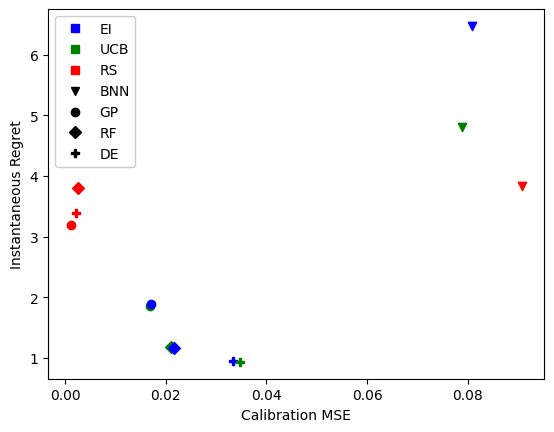

In [172]:
marker_dict = {'BNN':'v', 'GP': "o", 'RF':'D', 'DE':'P'}
color_dict = {'EI':'b', 'UCB':'g', 'RS':'r'}
for index, row in df.iterrows():
    plt.scatter(row['calibration_mse'], row['tot_regret_pool'], marker=marker_dict[row['surrogate']], color=color_dict[row['acquisition']])

    
f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", list(color_dict.values())[i]) for i in range(3)]
handles += [f(list(marker_dict.values())[i], "k") for i in range(4)]
labels = list(color_dict.keys()) + ['BNN', 'GP', 'RF', 'DE']

plt.legend(handles, labels, loc=2, framealpha=1)
plt.xlabel('Calibration MSE')
plt.ylabel('Instantaneous Regret')
plt.show()

In [175]:
#TODO: Calculate new sample distance to nearest in training data at every BO iteration.
#TODO: Make ranking. Rank combinations of acq and surrogate for one specific seed, dataset.


101
